# Métodos Estocásticos III: Métodos de Monte Carlo

<div>
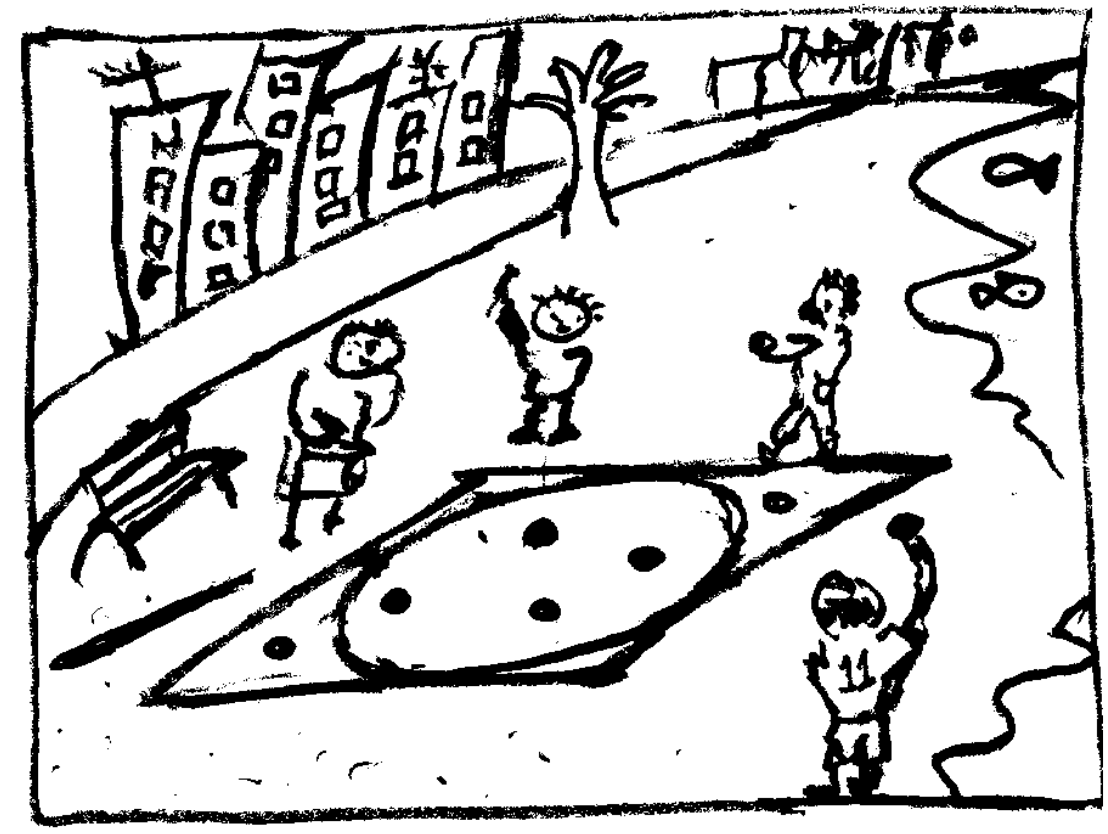
</div>

_Niños calculando $\pi$ en la playa de Monte Carlo_

## Muestreo Directo

### Ejercicio

Escriba en `python` el siguiente pseudocódigo para calcular $\pi$:

1. nTiros = N
2. nAciertos = 0
3. Para un i desde 0 hasta nTiros:
    4. x = random()
    5. y = random()
    6. Si x^2 + y^2 < 1
        7. nAciertos += 1
    8. Imprima nAciertos
    9. Calcule la razón entre nAciertos y nTiros
    10. Calcule $\pi$ como cuatro veces la razón entre nAciertos y nTiros
    
- Para un cuadrado de lado 2r:
    - Área de cuadrado: $4r^2$, si se toma un cuarto del cuadrado: $A_{cuadrado} = r^2$

- Área del círculo: $\pi r^2$, si se toma un cuarto del circulo: $A_c = \dfrac{\pi}{4}r^2$
            
$$
\dfrac{A_c}{A_{cuadrado}} = \dfrac{nAciertos}{nTiros}= \dfrac{\pi}{4}
$$

Área por el método Monte Carlo	3.11200
Área del círculo unitario 	3.14159
Error 				0.94196 %


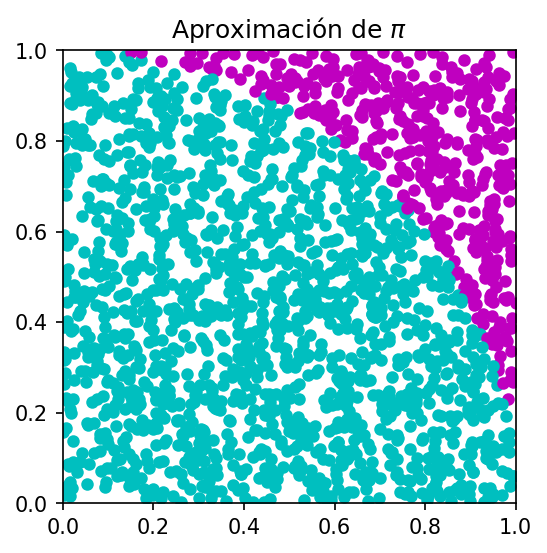

In [3]:
import numpy as np
import matplotlib.pyplot as plt

"""
Método de Monte Carlo para calcular el área de un círculo unitario
"""
# Generar números aleatorios con una semilla determinada
# np.random.seed(32423)

# Total de números aleatorios a generar
nNumeros = 2000
nArea = 0

# Gráfico
fig, ax = plt.subplots(1, 1, dpi=150)

for iContador in range(nNumeros):
    xAleatorio = np.random.random()
    yAleatorio = np.random.random()

    if xAleatorio**2 + yAleatorio**2 <= 1:
        nArea += 1
        ax.scatter(xAleatorio, yAleatorio, c='c', s=25)
    else:
        ax.scatter(xAleatorio, yAleatorio, c='m', s=25)
    
areaMonteCarlo = 4*nArea/nNumeros
areaUnitario = np.pi

print('Área por el método Monte Carlo\t{:.5f}'.format(areaMonteCarlo))
print('Área del círculo unitario \t{:.5f}'.format(areaUnitario))
print('Error \t\t\t\t{:.5f} %'.format(100*abs(areaUnitario - areaMonteCarlo)/areaUnitario))

ax.set_title('Aproximación de $\pi$')
ax.set_xlim([0,1])
ax.set_ylim([0,1])
ax.set_aspect('equal')

# plt.show()

# Integración

Integración por valor medio: Se tiene el teorema del valor intermedio
$$
\int_a^b f(x)\mathrm{d}x = (b -a)\langle f\rangle
$$

Se usa la técnica de Monte Carlo para calcular el valor medio de f:
$$
\langle f\rangle \simeq \dfrac{1}{N}\sum_{i=1}^N f(x_i)
$$

donde los $x_i$ son una secuencia uniforme de números aleatorios que cumplen: $a < x_i < b$

$$
\int_a^b f(x)\mathrm{d}x \simeq \dfrac{(b-a)}{N}\sum_{i=1}^N f(x_i)
$$

Donde conforme $N \rightarrow \infty$ el error en el valor obtenido decrece como $\dfrac{1}{\sqrt N}$

## Monte Carlo Multidimensional

Se puede generalizar la integración por valor medio a muchas dimensiones.
Ahora se toman toman puntos aleatorios en un espacio multidimensional. Por ejemplo, en 2D:
$$
\int_a^b\mathrm{d}x\int_c^d\mathrm{d}y f(x,y) \simeq (b-a)(d-c)\dfrac{1}{N}\sum_{i}^N f(\vec x_i) = (b-a)(d-c)\langle f \rangle
$$

### Ejercicio

Realice el procedimiento anterior con las siguientes integrales:
$$
I_2 = \int_0^1 \exp{(\sqrt{x^3 + 5x})} \mathrm{d}x\\
I_3 = \int_0^\infty \exp{(-x^2)}\mathrm{d}x
$$


## Formas de aumentar la eficiencia de la integración usando las técnicas de Monte Carlo

### Método de reducción de la varianza

Se trata de obtener una función más plana donde se aplique mejor la técnica de Monte Carlo.
Suponga una función $g(x)$ que cumpla las siguientes propiedades:
$$
|f(x)-g(x)|\leq \epsilon, \> \int_a^b\mathrm{d}x~g(x) = J
$$

Ahora se evalúa la integral de $f(x) - g(x)$ y se suma J al resultado para obtener la integral requerida:
$$
\int_a^b \mathrm{d}x~f(x) = \int_a^b\mathrm{d}x~[f(x)-g(x)]+J
$$

Si se encuentra una $g(x)$ tal que la varianza de $f(x)-g(x)$ es menor que la de $f(x)$ y que sea integrable analíticamente, se obtienen resultados más precisos en menos tiempo.

### Muestreo por importancia

Este método nos permite hacer un muestreo de las regiones más importantes del integrando. 

Para una función $g(x)$ se calcula su valor esperado con una función de pesos $w(x)$ en el intervalo de _a_ a _b_:

$$
\langle g(x) \rangle_w = \frac{\int_a^b w(x)g(x)\mathrm{d}x}{\int_a^b w(x)\mathrm{d}x}
$$

Ahora se considera la integral:
$$
I = \int_a^b f(x)~\mathrm{d}x
$$

Se define: $g(x) = \dfrac{f(x)}{w(x)}$ y se calcula su valor esperado con los pesos $w(x)$:

$$
\Big\langle \dfrac{f}{w}\Big\rangle = \frac{\int_a^b w(x)f(x)/w(x)\mathrm{d}x}{\int_a^b w(x)\mathrm{d}x}= \frac{\int_a^b f(x)\mathrm{d}x}{\int_a^b w(x)\mathrm{d}x} = \dfrac{I}{\int_a^b w(x)\mathrm{d}x}
$$

Finalmente:

$$
I = \Big\langle \dfrac{f}{w}\Big\rangle \int_a^bw(x)\mathrm{d}x \simeq \dfrac{1}{N}\sum_{i=1}^N\dfrac{f(x_i)}{w(x_i)}\int_a^bw(x)\mathrm{d}x
$$

La función $w(x)$ se usa como la distribución de probabilidad para nuestros números aleatorios.

### Método de rechazo de von Neumann

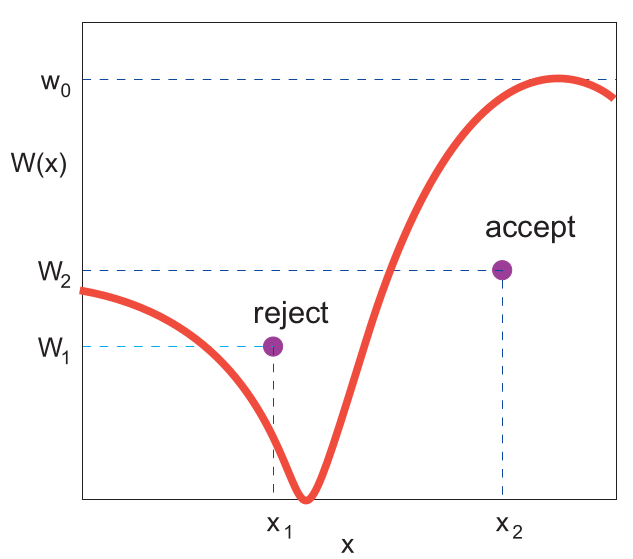

## Referencias

- Krauth, W.(2006). _Statistical Mechanics: Algorithms and Computations_. Oxford Master Series in Physics. Oxford University Press, UK.
- Landau, R. H., Páez, J., & Bordeianu, C. C. (2011). _A Survey of Computational
Physics: Introductory Computational Science_. Princeton: Princeton
University Press.